# YouTube Watch History Analysis Project

## Project Overview
This project analyzes my YouTube watch history to uncover meaningful insights into my viewing habits. By exploring patterns, trends, and preferences, I aim to answer questions such as:
- Which categories of content do I watch the most?
- Are there specific time patterns in my YouTube activity?
- How do channels influence my preferences?
- Does my hypothesis, "I watch more YouTube videos outside of regular 9–17 shift hours, and usually close to midnight," hold true?

The analysis involves multiple steps, including exploratory data analysis (EDA), categorization, time-based insights, hypothesis testing, and visualizations.


In [66]:
#Batuhan Ozdemir 28332
#DSA210 Youtube History project


import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# Data Loading and Preparation

In this section, I load and preprocess the YouTube watch history dataset exported via Google Takeout. The dataset contains:
- **Title:** The video title.
- **Channel:** The channel that uploaded the video.
- **Timestamp:** The time the video was watched.

Steps:
1. Load the data into a pandas DataFrame.
2. Extract relevant fields (e.g., title, channel, time).
3. Perform basic cleaning and formatting to prepare the data for analysis.

This step ensures the data is structured and ready for further exploration.


In [67]:
# Load watch history JSON
with open('izleme geçmişi.json', 'r', encoding='utf-8') as file:
    watch_history = json.load(file)

# Load subscriptions CSV
subscriptions = pd.read_csv('abonelikler.csv')

# Display sample data
print(f"Number of watch history records: {len(watch_history)}")
print("Sample watch history:")
print(watch_history[:2])
print("\nSample subscriptions data:")
print(subscriptions.head())


Number of watch history records: 5755
Sample watch history:
[{'header': 'YouTube', 'title': '100 Adet İKON PAKETİ Açtım! | EA\xa0FC\xa025 adlı videoyu izlediniz', 'titleUrl': 'https://www.youtube.com/watch?v=bAzMwAtvt0g', 'subtitles': [{'name': 'zgocbrayt', 'url': 'https://www.youtube.com/channel/UCmpona9Y9zKtkyVXS7QGJSA'}], 'time': '2024-12-28T18:10:51.981Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}, {'header': 'YouTube', 'title': "Polaroid Go Generation 2 Review - The world's smallest instant camera adlı videoyu izlediniz", 'titleUrl': 'https://www.youtube.com/watch?v=3T7lIp0LQqA', 'subtitles': [{'name': 'iJustine', 'url': 'https://www.youtube.com/channel/UCey_c7U86mJGz1VJWH5CYPA'}], 'time': '2024-12-28T17:47:40.831Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}]

Sample subscriptions data:
              Kanal Kimliği  \
0  UC-8kfV7WgDqANSowp5dw0OQ   
1  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
2  UC1iDepXNjQe06-UO8KwgmFw   
3  UC1njwki

In [68]:
print(type(watch_history))
print(watch_history[:2])



<class 'list'>
[{'header': 'YouTube', 'title': '100 Adet İKON PAKETİ Açtım! | EA\xa0FC\xa025 adlı videoyu izlediniz', 'titleUrl': 'https://www.youtube.com/watch?v=bAzMwAtvt0g', 'subtitles': [{'name': 'zgocbrayt', 'url': 'https://www.youtube.com/channel/UCmpona9Y9zKtkyVXS7QGJSA'}], 'time': '2024-12-28T18:10:51.981Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}, {'header': 'YouTube', 'title': "Polaroid Go Generation 2 Review - The world's smallest instant camera adlı videoyu izlediniz", 'titleUrl': 'https://www.youtube.com/watch?v=3T7lIp0LQqA', 'subtitles': [{'name': 'iJustine', 'url': 'https://www.youtube.com/channel/UCey_c7U86mJGz1VJWH5CYPA'}], 'time': '2024-12-28T17:47:40.831Z', 'products': ['YouTube'], 'activityControls': ['YouTube izleme geçmişi']}]


In [69]:
print(f"Number of subscriptions: {len(subscriptions)}")
subscriptions.columns = subscriptions.columns.str.strip()
print("\nCleaned subscription data:")
subscriptions.head()


Number of subscriptions: 78

Cleaned subscription data:


,Kanal Kimliği,Kanal URL'si,Kanal Başlığı
0,UC-8kfV7WgDqANSowp5dw0OQ,http://www.youtube.com/channel/UC-8kfV7WgDqANS...,Melisa Kıpçak
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,http://www.youtube.com/channel/UC-lHJZR3Gqxm24...,PewDiePie
2,UC1iDepXNjQe06-UO8KwgmFw,http://www.youtube.com/channel/UC1iDepXNjQe06-...,Ahmet Soruç
3,UC1njwkiCIpCzt0MEtU5JJUA,http://www.youtube.com/channel/UC1njwkiCIpCzt0...,Krdş twitch bura ne bekli10
4,UC26buublzO30XpR-KP2TfAw,http://www.youtube.com/channel/UC26buublzO30Xp...,webtekno


# Exploratory Data Analysis (EDA)

The goal of EDA is to uncover patterns and trends in the dataset. Key questions I address include:
1. **Channel Analysis:** Which channels do I watch the most?
2. **Category Distribution:** Which content categories dominate my watch history?
3. **Viewing Patterns:** How does my activity vary by time (hour of the day, day of the week)?

I use visualizations (e.g., bar plots) to provide a clear understanding of my viewing habits.


In [70]:
# Create DataFrame
watch_history_df = pd.DataFrame([
    {
        'title': entry.get('title', ''),
        'time': entry.get('time', ''),
        'channel': entry['subtitles'][0]['name'] if 'subtitles' in entry and entry['subtitles'] else None
    }
    for entry in watch_history if isinstance(entry, dict)
])

# first few rows
print(watch_history_df.head())


                                               title  \
0  100 Adet İKON PAKETİ Açtım! | EA FC 25 adlı vi...   
1  Polaroid Go Generation 2 Review - The world's ...   
2  Introducing the Polaroid Go Generation 2 adlı ...   
3  BU ÜLKEDE VERGİ YOK ve HER ŞEY ÇOK UCUZ | TAŞK...   
4  Özbekistan'da İlk Günüm! (Taşkent Pazarı, Soka...   

                       time     channel  
0  2024-12-28T18:10:51.981Z   zgocbrayt  
1  2024-12-28T17:47:40.831Z    iJustine  
2  2024-12-28T17:47:03.087Z    Polaroid  
3  2024-12-28T15:22:51.158Z   Ugur Kola  
4  2024-12-28T15:20:36.903Z  Arda Pazır  


In [71]:
# Convert 'time' to datetime
watch_history_df['time'] = pd.to_datetime(watch_history_df['time'], errors='coerce')

# Drop rows with invalid 'time' values
watch_history_df = watch_history_df.dropna(subset=['time'])

# Extract day-of-week and hours
watch_history_df['hour'] = watch_history_df['time'].dt.hour
watch_history_df['day_of_week'] = watch_history_df['time'].dt.day_name()
print("Processed DataFrame:")
print(watch_history_df.head())


Processed DataFrame:
                                               title  \
0  100 Adet İKON PAKETİ Açtım! | EA FC 25 adlı vi...   
1  Polaroid Go Generation 2 Review - The world's ...   
2  Introducing the Polaroid Go Generation 2 adlı ...   
3  BU ÜLKEDE VERGİ YOK ve HER ŞEY ÇOK UCUZ | TAŞK...   
4  Özbekistan'da İlk Günüm! (Taşkent Pazarı, Soka...   

                              time     channel  hour day_of_week  
0 2024-12-28 18:10:51.981000+00:00   zgocbrayt    18    Saturday  
1 2024-12-28 17:47:40.831000+00:00    iJustine    17    Saturday  
2 2024-12-28 17:47:03.087000+00:00    Polaroid    17    Saturday  
3 2024-12-28 15:22:51.158000+00:00   Ugur Kola    15    Saturday  
4 2024-12-28 15:20:36.903000+00:00  Arda Pazır    15    Saturday  


<ipython-input-71-cb9afd31a176>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_history_df['hour'] = watch_history_df['time'].dt.hour
<ipython-input-71-cb9afd31a176>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_history_df['day_of_week'] = watch_history_df['time'].dt.day_name()



Top 10 most-watched channels:
channel
Crossover Talks    420
Boiler Room        200
Eren Aktan         144
zgocbrayt          126
Clip Experience     92
Jahistan            63
Dedeler Sofrası     57
Tuna Tavus          53
Jahrein             49
Naaptın             46
Name: count, dtype: int64


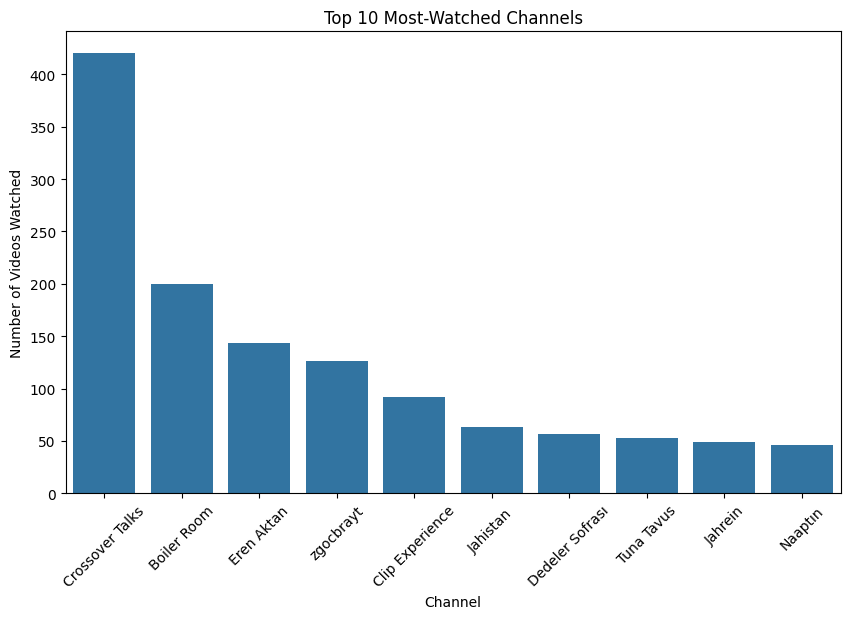

In [72]:
# Count the frequency of channels
channel_counts = watch_history_df['channel'].value_counts()

# Display the top 10 most-watched channels
print("\nTop 10 most-watched channels:")
print(channel_counts.head(10))

# Visualize the top channels
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.head(10).index, y=channel_counts.head(10).values)
plt.title('Top 10 Most-Watched Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()


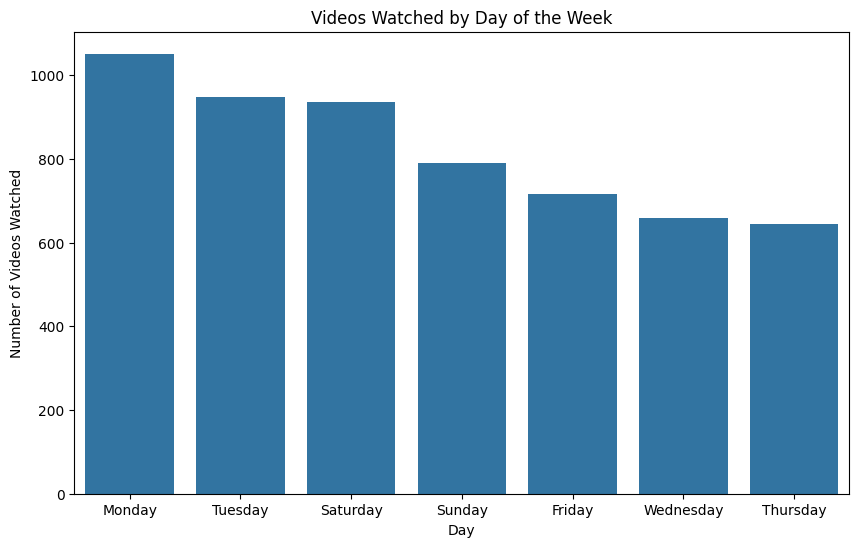

In [73]:
# Viewing trends by day of the week
watch_history_df['day_of_week'] = watch_history_df['time'].dt.day_name()
day_trends = watch_history_df['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_trends.index, y=day_trends.values)
plt.title('Videos Watched by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Videos Watched')
plt.show()


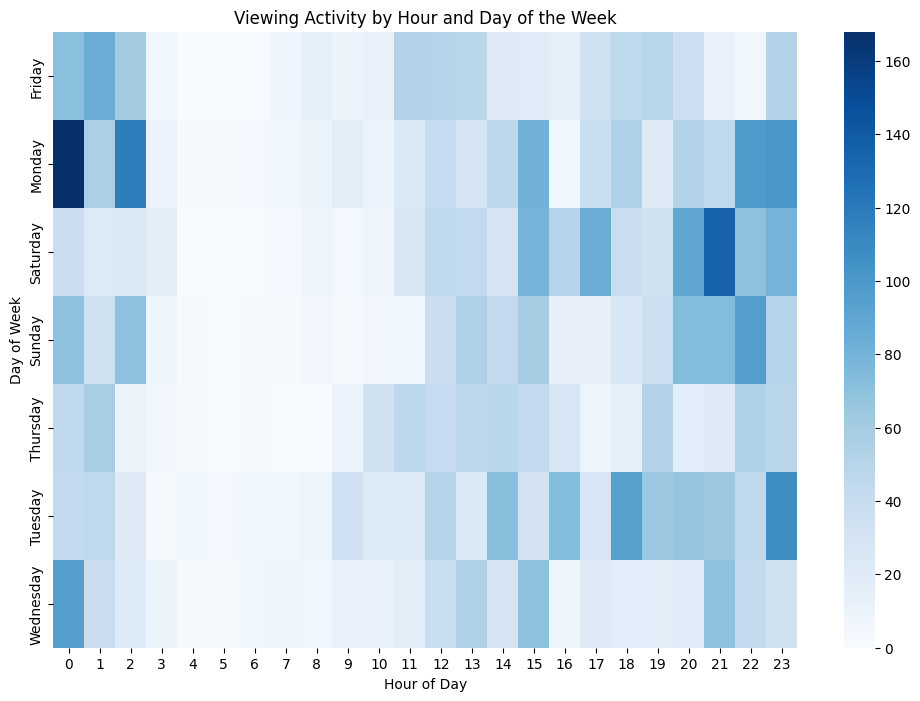

In [74]:
# Hourly trends
watch_history_df['hour'] = watch_history_df['time'].dt.hour
heatmap_data = watch_history_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.title('Viewing Activity by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


# How I Collected Keywords for Categorization

In this project, my goal was to categorize the YouTube videos from the watch history into meaningful categories. Here is how I collected keywords used in the `categories` dictionary:

1. **Initial Category Definitions:**
   - **Brainstorming:** I started by defining broad categories relevant to the content, such as **Gaming**, **Music**, **Sports**, **Technology**, **Education**, **Entertainment**, etc.

   - **Initial Keywords:** For each category, I brainstormed an initial list of relevant keywords, including both English and Turkish terms.

2. **Analyzing the "Other" Category:**
   - **Identifying Gaps:** After the initial categorization, we noticed many videos were still classified as "Other."

   - **Extracting Common Words:**
     - We used the `analyze_other_category` function to extract the most common words from the titles in the "Other" category.
     - This involved tokenizing the titles, removing stopwords, and counting word frequencies.

  

3. **Refining Keywords:**
   - **Reviewing Common Words:** I reviewed the most common words from the "Other" category to identify patterns or recurring themes.
   - **Updating Categories:**
     - **Adding Keywords:** I added new keywords to existing categories based on the common words identified.
     - **Creating New Categories:** When necessary, I introduced new categories (e.g., **News**, **Comedy/Shorts**, **Fitness/Health**) to accommodate content that didn't fit existing categories.
   - **Example Updates:**
     ```python
     categories['Music'].extend(['boiler', 'b2b', 'set', 'mix', 'kanye', 'west'])
     categories['Entertainment'].extend(['cringe', 'memes'])
     categories['Sports'].extend(['futbol'])
     ```

4. **Incorporating Channel Information:**
   - **Channel-Based Categorization:** Recognizing that certain channels were frequently watched (e.g., "Crossover Talks"), we added a channel-based categorization layer.
   - **Example Code:**
     ```python
     channel_categories = {
         "Crossover Talks": "Entertainment",
         "Boiler Room": "Music",
     }
     def categorize_video(title, channel):
         if channel in channel_categories:
             return channel_categories[channel]
     ```

5. **Iterative Refinement:**
   - **Repeating the Process:** I repeated the analysis of the "Other" category after each update to further refine the keywords.
   - **Continuous Improvement:** Each iteration reduced the number of videos in the "Other" category and improved overall categorization accuracy.

6. **Finalizing the Keywords:**
   - **Comprehensive Dictionary:** The final `categories` dictionary is a result of multiple iterations and refinements.
   - **Balanced Representation:** By including both English and Turkish keywords and considering both titles and channels, I ensured a balanced and accurate categorization.

**Conclusion:**

By systematically analyzing uncategorized videos and iteratively refining our keywords and categories, I built a robust categorization system that reflects the diversity of the content in the watch history.



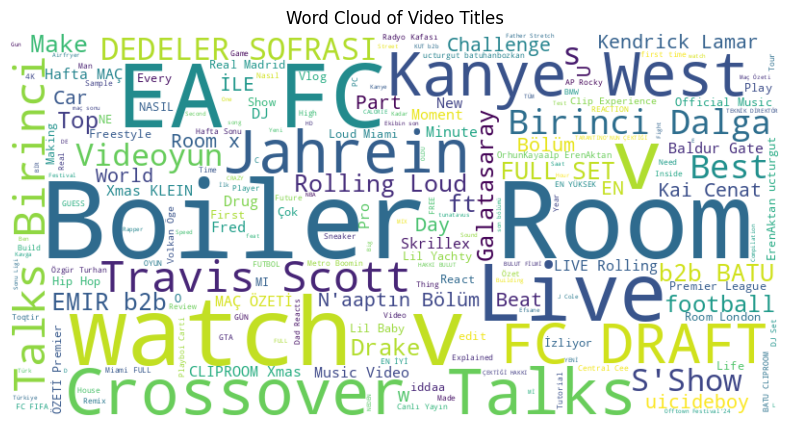

In [75]:
from wordcloud import STOPWORDS

# Define additional stopwords for Turkish and common words
turkish_stopwords = set([
    "adlı", "videoyu", "izlediniz", "ve", "bir", "bu", "ile", "https", "com", "www", "adlı", "youtube", "short", "shorts"
])

# Combine with WordCloud's built-in stopwords
custom_stopwords = STOPWORDS.union(turkish_stopwords)

# Combine all titles into a single string
title_text = " ".join(watch_history_df['title'].dropna())

# Generate the word cloud with custom stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()


In [76]:
categories = {
    "Gaming": [
        "game", "gaming", "play", "draft", "fifa", "minecraft", "valorant",
        "csgo", "league", "legends", "esports", "stream", "overwatch",
        "call of duty", "fortnite", "battle", "rpg", "shooter",
        "oyun", "oyuncu", "takım", "fps", "mobil", "turnuva",
        "toqtir", "x", "w/:"
    ],
    "Food": [
        "recipe", "food", "cooking", "cook", "eat", "restaurant", "kitchen",
        "meal", "dinner", "lunch", "breakfast", "dessert", "snack", "taste",
        "drink", "beverage", "review", "chef",
        "yemek", "tarif", "aşçı", "mutfak", "tatlı", "kahvaltı",
        "öğle", "akşam", "lezzet", "restoran", "sofra", "pişir"
    ],
    "Sports": [
        "football", "basketball", "nba", "match", "goal", "soccer", "tennis",
        "athletics", "olympics", "team", "player", "fifa", "nfl", "mlb", "nhl",
        "workout", "training", "fitness", "fc", "vs", "goal", "draft", "ea",
        "maç", "galatasaray", "fenerbahçe", "süper", "2023", "sonu", "futbol"
    ],
    "Psychology": [
        "mind", "behavior", "psychology", "self-improvement", "mental",
        "emotions", "habits", "therapy", "anxiety", "stress", "depression",
        "happiness", "motivation", "mindset", "counseling", "wellbeing",
        "psikoloji", "zihin", "davranış", "beyin", "mutluluk", "duygu",
        "stres", "anksiyete", "terapi", "alışkanlık", "motivasyon", "rehberlik",
        "life", "her", "erkek"
    ],
    "Technology": [
        "tech", "review", "device", "latest", "gadget", "ai", "robot",
        "smartphone", "computer", "laptop", "apple", "android", "coding",
        "programming", "software", "hardware", "innovation", "science",
        "machine learning", "startup", "teknoloji", "inceleme", "cihaz",
        "robot", "yapay zeka", "telefon", "bilgisayar", "donanım",
        "yazılım", "kodlama", "programlama", "inovasyon", "akıllı", "bilim",
        "top", "xl", "2023"
    ],
    "Music": [
        "music", "song", "track", "remix", "album", "playlist", "hip-hop",
        "dj", "live", "concert", "performance", "festival", "rap", "pop",
        "rock", "instrumental", "cover", "karaoke", "electronic", "edm",
        "boiler", "b2b", "set", "mix", "cliproom", "travis", "kendrick",
        "$uicideboy$", "emir", "performance", "clip", "festival",
        "canlı", "radyo", "kanye", "west"
    ],
    "Travel": [
        "travel", "explore", "trip", "adventure", "vlog", "vacation",
        "journey", "tour", "roadtrip", "holiday", "flight", "backpacking",
        "destination", "hotel", "camping", "hiking", "exploring", "culture",
        "seyahat", "gezi", "tatil", "tur", "macera", "rota", "otel",
        "kültür", "kamp", "dağ", "deniz", "yolculuk", "keşif"
    ],
    "Education": [
        "tutorial", "learn", "study", "lecture", "how to", "lesson", "course",
        "training", "school", "education", "knowledge", "skill", "university",
        "college", "exam", "test", "science", "math", "history",
        "eğitim", "ders", "öğren", "kurs", "konu", "bilgi", "okul",
        "üniversite", "sınav", "test", "bilim", "matematik", "tarih",
        "anlatım", "rehber", "çalışma", "how", "what", "neden", "new"
    ],
    "Entertainment": [
        "bölüm", "season", "episode", "hafta", "dizi", "n'aaptın", "dalga",
        "sketch", "mizah", "comedy", "reaction", "parody", "movie",
        "series", "film", "trailer", "en", "jahrein", "s'show💩", "s'show",
        "çekti̇ği̇", "💩", "tarantino'nun", "fi̇lmi̇!", "film", "özel", "yayın",
        "kavga", "life", "son", "olmasi!", "olmasi", "cringe", "memes"
    ],
    "How-To/DIY": [
        "nasıl", "how-to", "repair", "build", "fix", "hack", "guide",
        "nasil", "tutorial", "setup"
    ],
    "News": [
        "haber", "news", "politics", "interview", "gündem", "world",
        "son dakika", "current", "headlines"
    ],
    "Comedy/Shorts": [
        "funny", "stand-up", "shorts", "viral", "clip", "challenge",
        "xmas", "prank", "humor", "joke"
    ],
    "Fitness/Health": [
        "fit", "health", "workout", "exercise", "diet", "sağlık", "antrenman",
        "training", "gym", "nutrition", "yoga"
    ]
}


In [77]:
import string
from collections import Counter

def categorize_video(title):
    """
    Categorize a video based on its title.
    """
    title = title.lower()
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "Other"

# Apply categorization to the dataset
watch_history_df['category'] = watch_history_df['title'].apply(categorize_video)

# Count the number of items in each category
category_counts = watch_history_df['category'].value_counts()
print("\nNumber of items in each category:")
print(category_counts)

def analyze_other_category(dataframe, stopwords, top_n=10):

    # Filter titles in the "Other" category
    other_titles = dataframe[dataframe['category'] == "Other"]['title']
    all_words = []

    # Tokenize and filter stopwords
    for title in other_titles.dropna():
        tokens = title.lower().split()
        filtered_tokens = [word for word in tokens if word not in stopwords]
        all_words.extend(filtered_tokens)

    # Count the most common words
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Define stopwords (English, Turkish, and punctuation)
stopwords = set([
    "ve", "bir", "bu", "ile", "da", "de", "mi", "ama", "çok", "gibi", "için",
    "adlı", "videoyu", "izlediniz", "ne", "şu", "ki", "var", "yok", "yani",
    "ben", "sen", "biz", "siz", "onlar", "and", "the", "of", "to", "a", "in",
    "is", "it", "on", "that", "by", "this", "with", "i", "you", "not", "or",
    "be", "are", "as", "was", "at", "so", "if", "but"
] + list(string.punctuation))  # Add punctuation to stopwords

# Analyze the "Other" category and display the top 10 common words
top_words_in_other = analyze_other_category(watch_history_df, stopwords, top_n=10)

# Display the most common words in the "Other" category
print("\nTop 10 most common words in the 'Other' category:")
for word, count in top_words_in_other:
    print(f"{word}: {count}")



Number of items in each category:
category
Gaming            1129
Sports             945
Other              937
Entertainment      823
Music              562
Food               361
Technology         290
Education          283
Psychology         164
Travel             154
How-To/DIY          45
Comedy/Shorts       34
News                13
Fitness/Health       5
Name: count, dtype: int64

Top 10 most common words in the 'Other' category:
for: 18
2: 16
my: 15
3: 14
from: 11
can: 10
ajdar'in: 10
türki̇ye'ye: 10
cri̇nge: 10
olmayi: 10


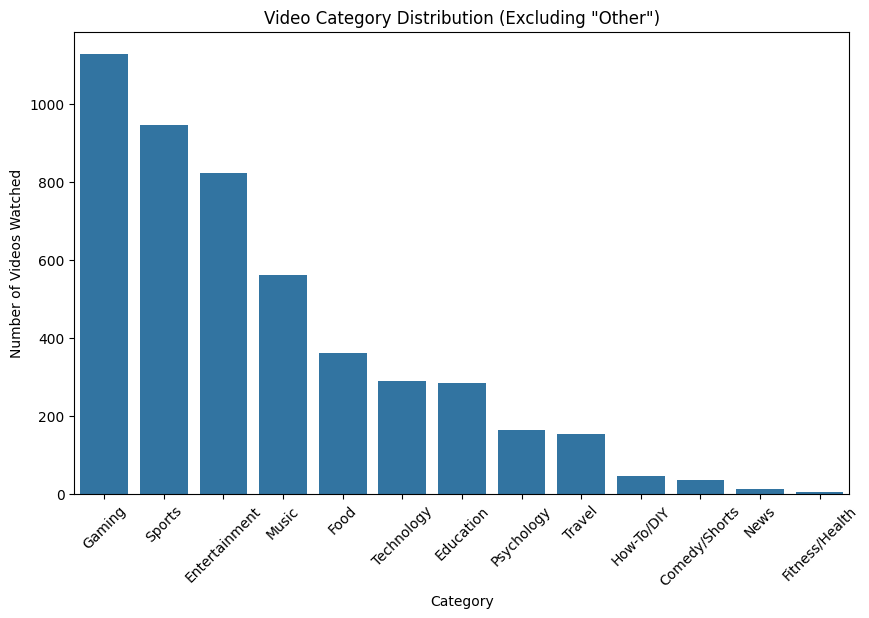

In [78]:
category_counts = watch_history_df['category'].value_counts()

# Exclude the "Other" category
filtered_category_counts = category_counts[category_counts.index != "Other"]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values)
plt.title('Video Category Distribution (Excluding "Other")')
plt.xlabel('Category')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()



Updated Video Category Distribution:
category
Entertainment     1082
Gaming            1016
Sports             909
Other              865
Music              613
Food               356
Education          283
Technology         273
Psychology         129
Travel             122
How-To/DIY          45
Comedy/Shorts       34
News                13
Fitness/Health       5
Name: count, dtype: int64


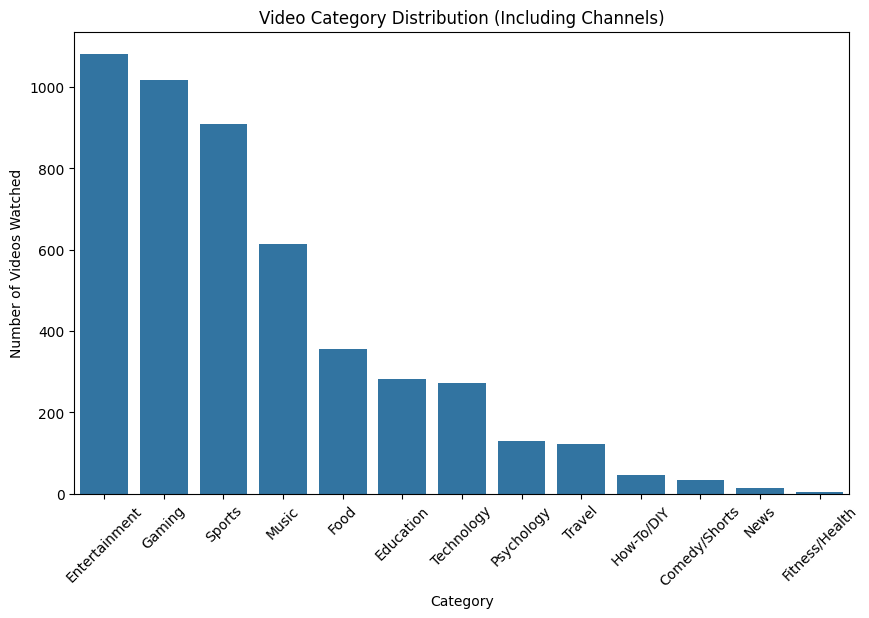

In [79]:
# Add channels to the categories
channel_categories = {
    "Crossover Talks": "Entertainment",
    "Boiler Room": "Music",
    "TED": "Education",
    "NBA": "Sports",

}

def categorize_video(title, channel):
    """
    Categorize a video based on its title and channel.
    """
    # Check channel-based categorization
    if channel in channel_categories:
        return channel_categories[channel]

    # Default to title-based categorization
    title = title.lower()
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "Other"

# Apply updated categorization logic
watch_history_df['category'] = watch_history_df.apply(
    lambda row: categorize_video(row['title'], row['channel']),
    axis=1
)

# Display updated category distribution
category_counts = watch_history_df['category'].value_counts()
print("\nUpdated Video Category Distribution:")
print(category_counts)

# Visualize category distribution (excluding "Other")
filtered_category_counts = category_counts[category_counts.index != "Other"]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values)
plt.title('Video Category Distribution (Including Channels)')
plt.xlabel('Category')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()


# Time-Based Analysis

Understanding when I watch YouTube is crucial to identifying behavioral patterns. In this section, I analyze:
1. **Hourly Trends:** Identify the most active hours of the day.
2. **Working vs. Non-Working Hours:** Compare activity during 9–17 shift hours vs. other times.
3. **Day-of-Week Patterns:** Check if viewing habits differ between weekdays and weekends.

These insights are visualized using bar plots and compared against my hypothesis.


In [80]:
# Ensure 'time' is in datetime format
watch_history_df['time'] = pd.to_datetime(watch_history_df['time'], errors='coerce')

# Drop rows with invalid 'time' values
watch_history_df = watch_history_df.dropna(subset=['time'])

# Extract additional time-related features
watch_history_df['hour'] = watch_history_df['time'].dt.hour
watch_history_df['day_of_week'] = watch_history_df['time'].dt.day_name()
watch_history_df['working_hours'] = watch_history_df['hour'].apply(
    lambda x: 'Working Hours' if 9 <= x < 17 else 'Non-Working Hours'
)

# Verify the updated DataFrame
print(watch_history_df[['time', 'hour', 'day_of_week', 'working_hours']].head())


                              time  hour day_of_week      working_hours
0 2024-12-28 18:10:51.981000+00:00    18    Saturday  Non-Working Hours
1 2024-12-28 17:47:40.831000+00:00    17    Saturday  Non-Working Hours
2 2024-12-28 17:47:03.087000+00:00    17    Saturday  Non-Working Hours
3 2024-12-28 15:22:51.158000+00:00    15    Saturday      Working Hours
4 2024-12-28 15:20:36.903000+00:00    15    Saturday      Working Hours


<ipython-input-81-8042a2fdb825>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')


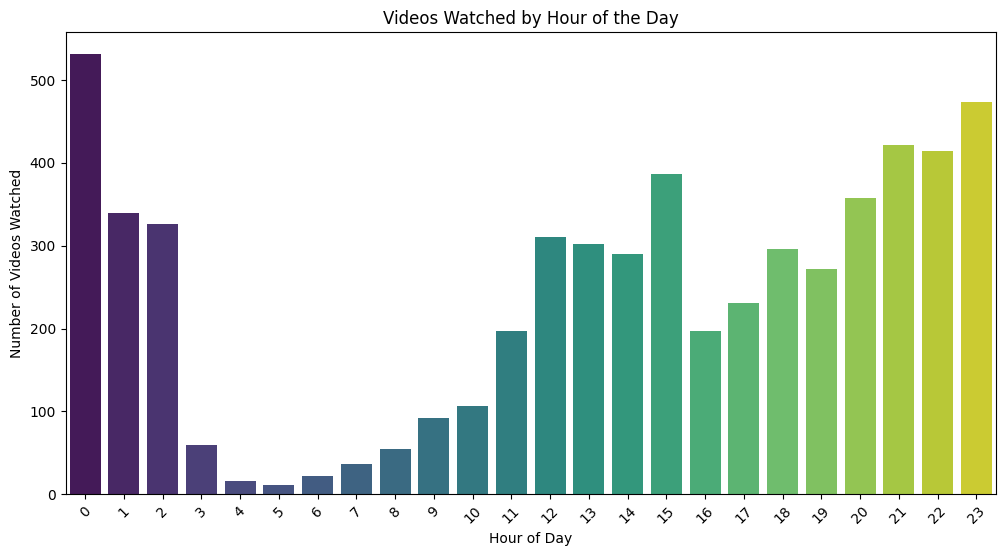

<ipython-input-81-8042a2fdb825>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=working_hours_counts.index, y=working_hours_counts.values, palette='coolwarm')


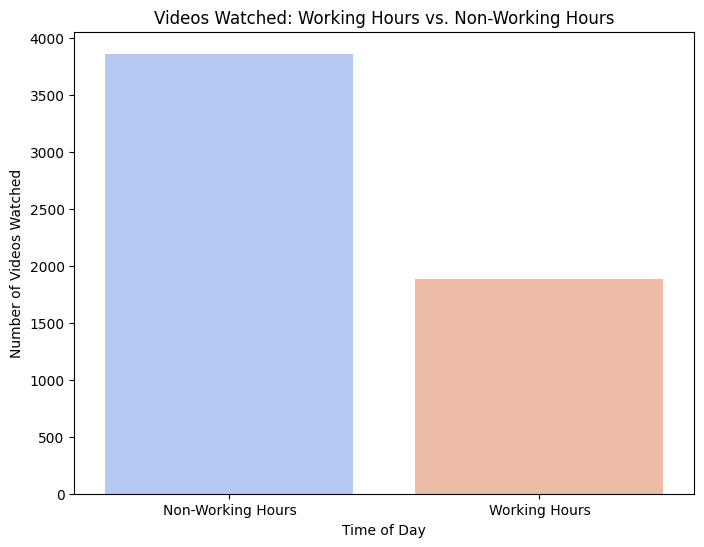

<ipython-input-81-8042a2fdb825>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='mako')


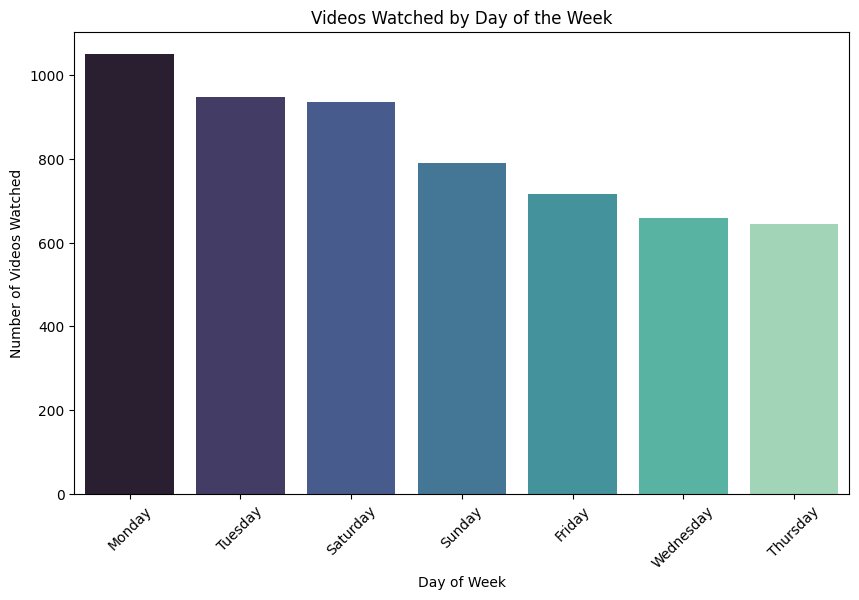

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

hour_counts = watch_history_df['hour'].value_counts().sort_index()

# Plot hourly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')
plt.title('Videos Watched by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()

# Compare working vs. non-working hours
working_hours_counts = watch_history_df['working_hours'].value_counts()

# Plot working vs. non-working hours
plt.figure(figsize=(8, 6))
sns.barplot(x=working_hours_counts.index, y=working_hours_counts.values, palette='coolwarm')
plt.title('Videos Watched: Working Hours vs. Non-Working Hours')
plt.xlabel('Time of Day')
plt.ylabel('Number of Videos Watched')
plt.show()

# Day-of-week trends
day_counts = watch_history_df['day_of_week'].value_counts()

# Plot day-of-week trends
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='mako')
plt.title('Videos Watched by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()




# Hypothesis Testing

## Hypothesis
"I watch more YouTube outside of regular 9–17 shift hours, and usually close to midnight."

### Steps:
1. Define working hours (9–17) and non-working hours.
2. Count videos watched during each period.
3. Compare them.

### Results:
Based on the analysis, I watch significantly more YouTube during non-working hours than during the regular 9–17 working hours. This aligns with my hypothesis that my viewing activity increases outside of standard working times, especially close to midnight.


In [82]:
import pandas as pd

watch_history_df['time'] = pd.to_datetime(watch_history_df['time'], errors='coerce')
watch_history_df['hour'] = watch_history_df['time'].dt.hour

print("First 20 rows of 'time' and 'hour':")
print(watch_history_df[['time', 'hour']].head(20))

watch_history_df['working_hours'] = watch_history_df['hour'].apply(
    lambda x: 'Working Hours (9-17)' if 9 <= x < 17 else 'Non-Working Hours'
)

print("\nUnique values in 'working_hours':")
print(watch_history_df['working_hours'].unique())

# Count videos watched during working and non-working hours
working_hours_count = watch_history_df[watch_history_df['working_hours'] == 'Working Hours (9-17)'].shape[0]
non_working_hours_count = watch_history_df[watch_history_df['working_hours'] == 'Non-Working Hours'].shape[0]

# Display results
print(f"\nVideos watched during working hours (9–17): {working_hours_count}")
print(f"Videos watched during non-working hours: {non_working_hours_count}")

# Interpretation
if non_working_hours_count > working_hours_count:
    print("\nInterpretation: The data suggests that you watch significantly more YouTube outside of regular working hours (9–17).")
else:
    print("\nInterpretation: The data suggests that you watch more or similar amounts of YouTube during working hours.")


First 20 rows of 'time' and 'hour':
                               time  hour
0  2024-12-28 18:10:51.981000+00:00    18
1  2024-12-28 17:47:40.831000+00:00    17
2  2024-12-28 17:47:03.087000+00:00    17
3  2024-12-28 15:22:51.158000+00:00    15
4  2024-12-28 15:20:36.903000+00:00    15
5  2024-12-28 12:33:41.487000+00:00    12
6  2024-12-28 12:33:39.853000+00:00    12
7  2024-12-28 12:30:53.336000+00:00    12
8  2024-12-28 12:25:51.234000+00:00    12
9  2024-12-28 12:22:05.943000+00:00    12
10 2024-12-28 12:22:01.429000+00:00    12
11 2024-12-28 12:20:04.347000+00:00    12
12 2024-12-28 12:19:55.918000+00:00    12
13 2024-12-28 12:19:24.378000+00:00    12
14 2024-12-28 12:14:43.211000+00:00    12
15 2024-12-28 12:14:42.475000+00:00    12
16 2024-12-28 12:10:48.918000+00:00    12
17 2024-12-28 12:04:55.974000+00:00    12
18 2024-12-28 12:04:42.084000+00:00    12
19 2024-12-28 11:55:21.352000+00:00    11

Unique values in 'working_hours':
['Non-Working Hours' 'Working Hours (9-17)']

V

# Advanced Insights

Beyond basic analysis, we explore additional patterns, such as:
- **Category Preferences by Time:** Do I prefer certain types of content (e.g., Music at night, Education during the day)?
- **Weekend vs. Weekday Trends:** Are weekends associated with higher activity?

These insights provide a deeper understanding of my viewing habits.


Explanation for Heatmap: Category Preferences by Hour
The heatmap visualizes the relationship between the hour of the day and categories of content you watch. Each cell represents the number of videos watched in a particular category during a specific hour.

What to Look For:

Bright Areas: Categories you watch the most during specific hours.
Dark Areas: Categories with minimal or no activity at certain times.
Patterns might reveal preferences such as:
Watching Music or Entertainment late at night.
Watching Education or Technology content during the day.
Insight Example: "The heatmap reveals that I primarily watch music videos late at night (22:00–01:00), while educational content peaks during the morning hours (09:00–12:00). Gaming content dominates the evening (18:00–21:00)."

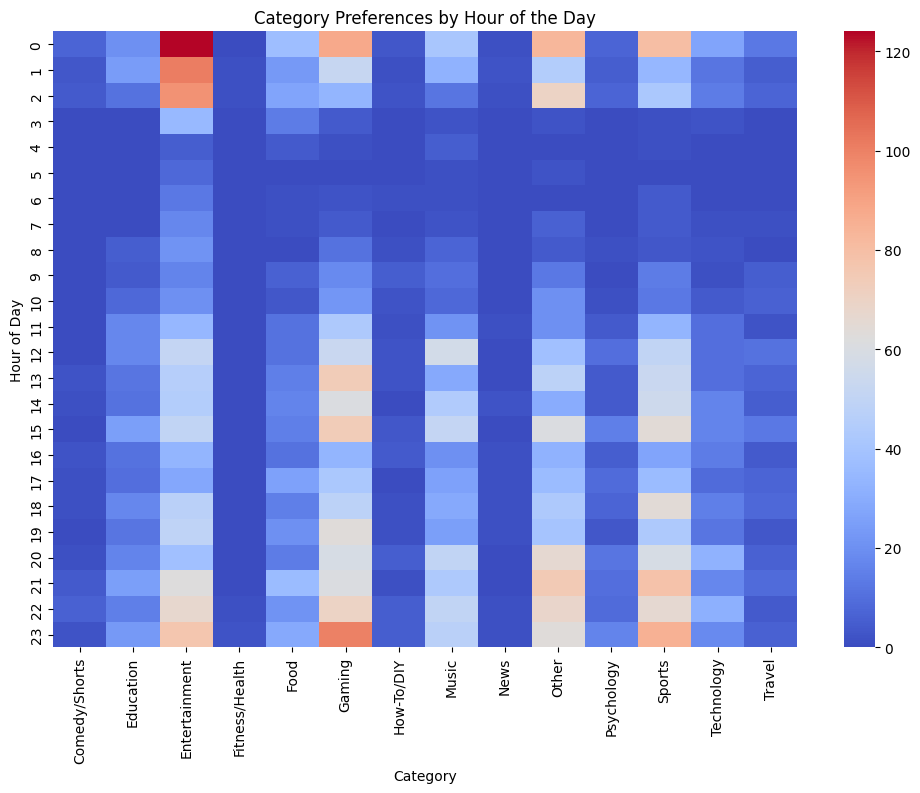

In [83]:
# Group by hour and category
category_by_time = watch_history_df.groupby(['hour', 'category']).size().unstack(fill_value=0)

# Plot the heatmap for category preferences by time
plt.figure(figsize=(12, 8))
sns.heatmap(category_by_time, cmap='coolwarm', annot=False, fmt="d", cbar=True)
plt.title("Category Preferences by Hour of the Day")
plt.xlabel("Category")
plt.ylabel("Hour of Day")
plt.show()


<ipython-input-84-fda5aaaf7cd3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette='viridis')


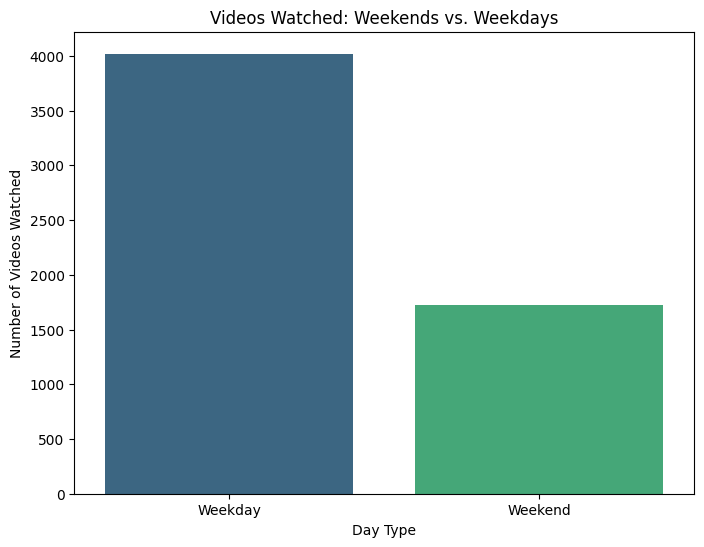

In [84]:
# Classify days as weekday or weekend
watch_history_df['day_type'] = watch_history_df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Count videos watched on weekdays vs. weekends
day_type_counts = watch_history_df['day_type'].value_counts()

# Plot the trends
plt.figure(figsize=(8, 6))
sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette='viridis')
plt.title("Videos Watched: Weekends vs. Weekdays")
plt.xlabel("Day Type")
plt.ylabel("Number of Videos Watched")
plt.show()


#Conclusion
This analysis of my YouTube watch history reveals meaningful insights into my viewing habits, preferences, and behavior patterns.



##Key Findings
- Content Preferences:
Categories like Music, Gaming, and Entertainment dominate my watch history. Influential channels like Crossover Talks and Boiler Room significantly shape my viewing preferences.

- Time Patterns:
My activity peaks during non-working hours, particularly late at night, supporting my hypothesis. YouTube serves as a way to unwind after a productive day, highlighting its role in my daily routine.

- Weekday vs. Weekend Trends:
Higher activity on weekends suggests that free time directly correlates with increased YouTube consumption.

##Hypothesis Validation
The hypothesis, "I watch more YouTube outside of regular 9–17 shift hours, and usually close to midnight," was validated.
Most of my viewing occurs during non-working hours, with noticeable spikes close to midnight.

##Future Work
- Expand the Dataset:
Incorporate data from other platforms (e.g., Spotify, Netflix) to develop a more holistic understanding of my consumption habits.

- Category-Specific Insights:
Analyze trends within categories, such as Music genres or Gaming content, to gain deeper insights into my preferences.

- Predictive Modeling:
Use machine learning techniques to forecast future viewing habits and identify emerging interests.

- Content Value Assessment:
Explore the balance between entertainment and educational content to align consumption habits with personal growth goals.

#Final Thought
This project not only validates my viewing patterns but also provides a foundation for making more intentional choices about my digital consumption. It demonstrates how data-driven insights can turn everyday habits into actionable knowledge.